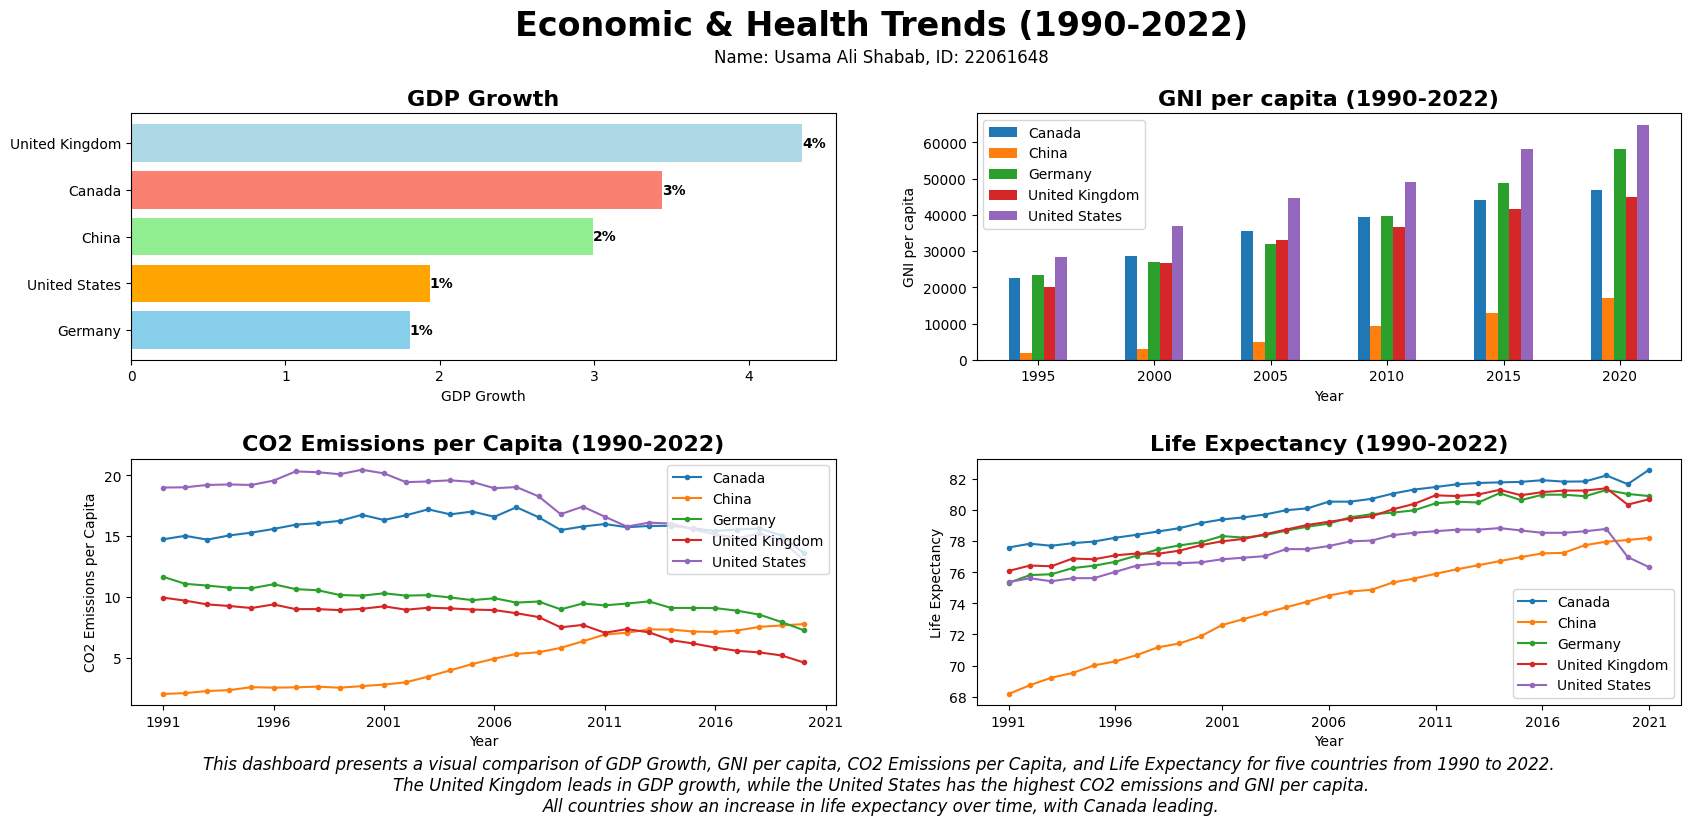

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def read_and_manipulate_data():
    df=pd.read_csv('30a52670-f442-4aa9-9400-1a0fe09f1da1_Data.csv')
    df.drop(columns=['Series Code','Country Code'],axis=1,inplace=True)
    df.rename(columns={'Country Name':'country','Series Name':'series'},inplace=True)
    for col in df.columns:
        if 'YR' in col:
            new_name=col.split('[')[0].strip()
            df.rename(columns={col:new_name},inplace=True)
            df[new_name] = pd.to_numeric(df[new_name], errors='coerce')

    all_indicators = {
        'GNI per capita, PPP (current international $)': 'GNI per capita',
        'Life expectancy at birth, total (years)': 'Life Expectancy',
        'GDP growth (annual %)': 'GDP Growth',
        'CO2 emissions (metric tons per capita)': 'CO2 Emissions per Capita'
    }

    df['series'] = df['series'].map(all_indicators)

    selected_indicators = list(all_indicators.values())
    df = df[df['series'].isin(selected_indicators)]
    return df


def horizontal_bar(ax,df,indicator_series):  
    selected_countries =['Canada', 'China', 'Germany', 'United Kingdom', 'United States']
    selected_data = df[df['series'] == indicator_series]

    selected_data = selected_data.drop(columns=['series'], axis=1)
    selected_data.sort_values(by=['2022'],inplace=True)
    selected_data = selected_data[selected_data['country'].isin(selected_countries)][['country', '2022']].set_index('country')
    colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightblue', 'purple', 'pink', 'brown', 'gray']

    bars=plt.barh(selected_data.index, selected_data['2022'], color=colors)
    plt.xlabel(indicator_series)
    plt.title(indicator_series,fontsize=16, fontweight='bold')

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                 '%d%%' % int(bar.get_width()), 
                 ha='left', va='center',weight='bold')
        
def line_plot(ax,df, indicator_series):
    selected_countries = ['Canada', 'China', 'Germany', 'United Kingdom', 'United States']
    title = f'{indicator_series} (1990-2022)'
    xlabel = 'Year'
    ylabel = indicator_series
    markersize = 3

    selected_data = df[df['series'] == indicator_series]

    selected_data = selected_data[selected_data['country'].isin(selected_countries)]
    for country in selected_countries:
        plt.plot(selected_data.columns[2:], selected_data[selected_data['country'] == country].iloc[0, 2:], label=country, marker='o', markersize=markersize)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontsize=16, fontweight='bold')
    plt.legend()
    plt.xticks(selected_data.columns[2::5])

    

def vertical_bar(ax,df, indicator_series, selected_years=[1995, 2000, 2005, 2010, 2015, 2020]):
    selected_countries = ['Canada', 'China', 'Germany', 'United Kingdom', 'United States']
    title = f'{indicator_series} (1990-2022)'
    xlabel = 'Year'
    ylabel = indicator_series
    markersize = 3

    selected_data = df[df['series'] == indicator_series]

    selected_data = selected_data[selected_data['country'].isin(selected_countries)][['country'] + [str(year) for year in selected_years]]

    bar_width = 0.1

    for i, country in enumerate(selected_countries):
        years = selected_data.columns[1:]
        values = selected_data[selected_data['country'] == country].iloc[0, 1:]
        plt.bar([x + i * bar_width for x in range(len(years))], values, label=country, width=bar_width)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontsize=16, fontweight='bold')
    plt.legend()
    plt.xticks([x + (len(selected_countries) - 1) * bar_width / 2 for x in range(len(years))], years)

df = read_and_manipulate_data()
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 4], height_ratios=[1, 1])
plt.subplots_adjust(top=0.85)

fig.suptitle('Economic & Health Trends (1990-2022)', fontsize=24, fontweight='bold')
fig.text(0.5, 0.92, "Name: Usama Ali Shabab, ID: 22061648", ha='center', va='center', fontsize=12)
ax1 = plt.subplot(gs[0])
horizontal_bar(ax1, df, 'GDP Growth')
ax2 = plt.subplot(gs[1])
vertical_bar(ax2, df, 'GNI per capita')
ax3 = plt.subplot(gs[2])
line_plot(ax3, df, 'CO2 Emissions per Capita')
ax4 = plt.subplot(gs[3])
line_plot(ax4, df, 'Life Expectancy')
plt.subplots_adjust(wspace=0.2,hspace=0.4)

summary_text = """This dashboard presents a visual comparison of GDP Growth, GNI per capita, CO2 Emissions per Capita, and Life Expectancy for five countries from 1990 to 2022. 
The United Kingdom leads in GDP growth, while the United States has the highest CO2 emissions and GNI per capita.
All countries show an increase in life expectancy over time, with Canada leading."""
fig.text(0.5, 0.01, summary_text, ha='center', va='center', fontsize=12, style='italic')
plt.show()